In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



11490434/11490434 [==============================] - 2s 0us/step


In [2]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')




Epoch 1/5
938/938 [==============================] - 13s 14ms/step - loss: 0.1746 - accuracy: 0.9452 - val_loss: 0.0575 - val_accuracy: 0.9830
Epoch 2/5
938/938 [==============================] - 13s 13ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0470 - val_accuracy: 0.9839
Epoch 3/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0394 - val_accuracy: 0.9868
Epoch 4/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0258 - val_accuracy: 0.9913
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0281 - accuracy: 0.9918
Test accuracy: 0.9918000102043152


In [3]:
# Predict on some test samples
predictions = model.predict(x_test[:5])
predicted_labels = tf.argmax(predictions, axis=1)



1/1 [==============================] - 0s 55ms/step


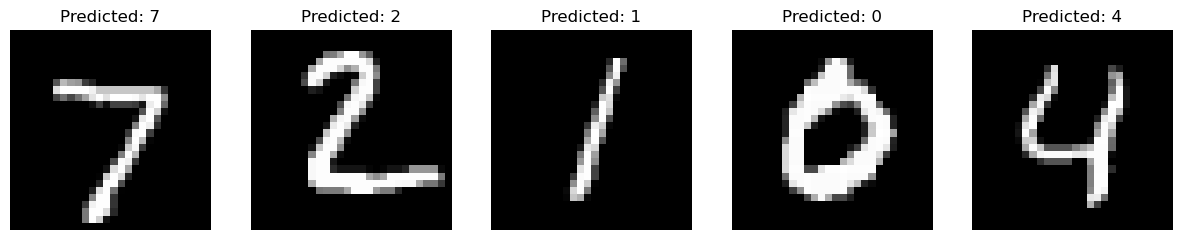

In [4]:
# Visualize the results
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Predicted: {predicted_labels[i]}')
    axes[i].axis('off')

plt.show()